<a href="https://colab.research.google.com/github/tripathiosho/ImportantNotebooks/blob/main/Perceptron_(AI_101).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


x,y=datasets.make_blobs(n_samples=30,
                   n_features=2,
                   centers=[[2,2],[10,10]],
                   center_box=(0,10),
                   cluster_std=3)

In [2]:
y

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1])

In [3]:
y[y==0]=-1

In [4]:
y

array([-1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1,
        1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1, -1,  1])

In [5]:
def show(w,w0,x,y):
    x_val=np.linspace(-5,10)
    y_val= (-w[0]*x_val-w0)/w[1]
    plt.plot(x_val,y_val)
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.xlim(x[:,0].min()+0.2,x[:,0].max()+0.2)
    plt.ylim(x[:,1].min()+0.2,x[:,1].max()+0.2)
    plt.show()

[-0.43744794 -0.77405739] -3.3093908097258207
-0.43744793525745507 -0.7740573932940458 -3.3093908097258207


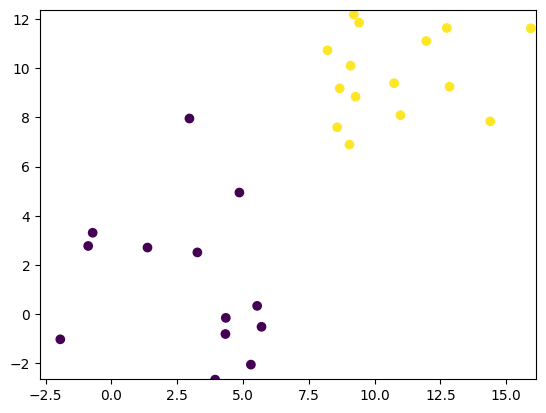

In [6]:
w = np.random.normal(size=(2,))
w0=np.random.normal()
print(w,w0)
print(w[0],w[1],w0)
# y_val= (-w[0]*x_val-w0)/w[1]
show(w,w0,x,y)

In [7]:
def dist_from_hyperplane(w,w0,x):
    d = (np.dot(w,x)+w0)/np.linalg.norm(w)
    return d

In [8]:
def perceptron_training(x,y,w,w0,num_iter=100):
    for i in range(num_iter):
        print("Iteration Number : ",i+1)
        miss_classified_points=0
        for (xi,yi) in zip(x,y):
            d=dist_from_hyperplane(w,w0,xi)
            hs = np.sign(d) #........this gives us the assigned label
            if hs != np.sign(yi): #.......here we are checking if the assigned and the actual label is same or not
                miss_classified_points += 1
                w = w + (xi*yi)
                w0 = w0 + np.sign(yi)
        print(f"Current Accuracy : {100-(100*miss_classified_points/len(y))}")
        print(f"Weights are W1 : {w[0]}, W2 : {w[1]}, W0 : {w0}")
        show(w,w0,x,y)
        if miss_classified_points==0:
            return w,w0
    return w, wo

Iteration Number :  1
Current Accuracy : 56.666666666666664
Weights are W1 : 3.7331901375903502, W2 : 10.53690939532821, W0 : -10.309390809725821


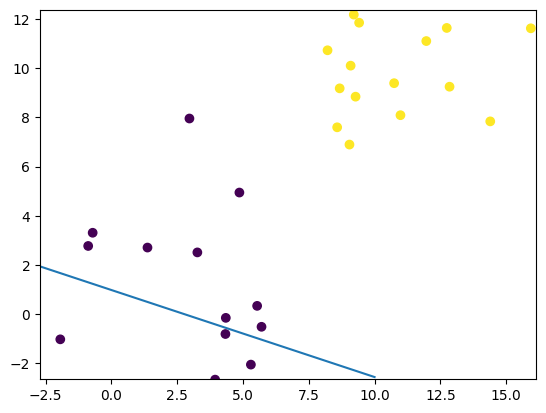

Iteration Number :  2
Current Accuracy : 63.333333333333336
Weights are W1 : -1.3646881453020097, W2 : 13.935483008878576, W0 : -17.30939080972582


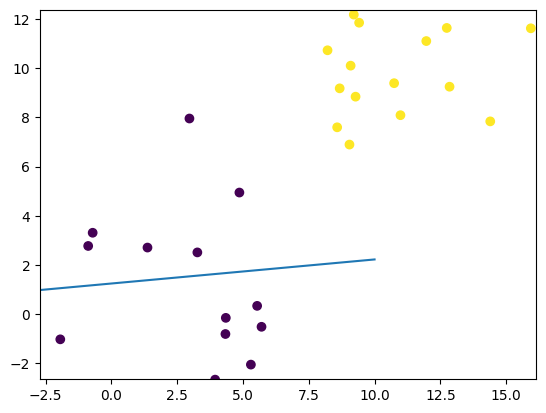

Iteration Number :  3
Current Accuracy : 76.66666666666667
Weights are W1 : -0.297539181594046, W2 : 4.4784683757874735, W0 : -22.30939080972582


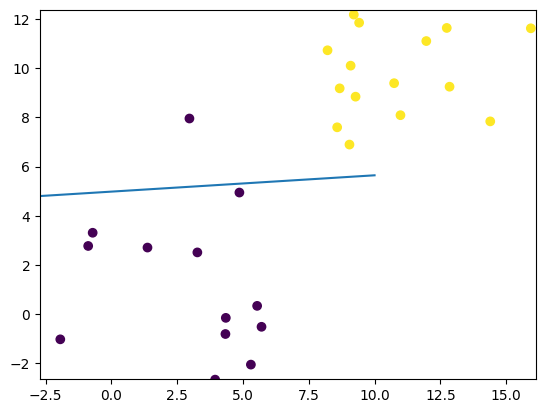

Iteration Number :  4
Current Accuracy : 70.0
Weights are W1 : 3.488534444801952, W2 : 3.243446592270616, W0 : -27.30939080972582


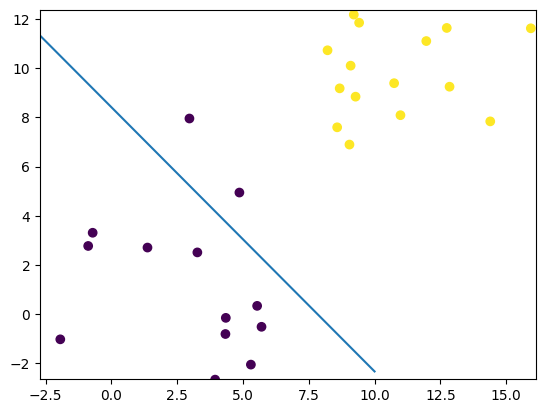

Iteration Number :  5
Current Accuracy : 83.33333333333333
Weights are W1 : 3.9901015056649385, W2 : 0.27461333627672335, W0 : -30.30939080972582


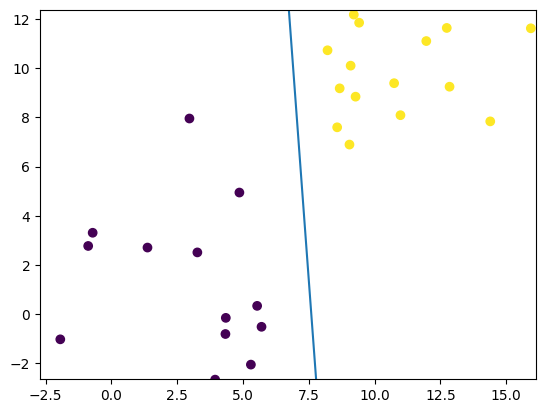

Iteration Number :  6
Current Accuracy : 100.0
Weights are W1 : 3.9901015056649385, W2 : 0.27461333627672335, W0 : -30.30939080972582


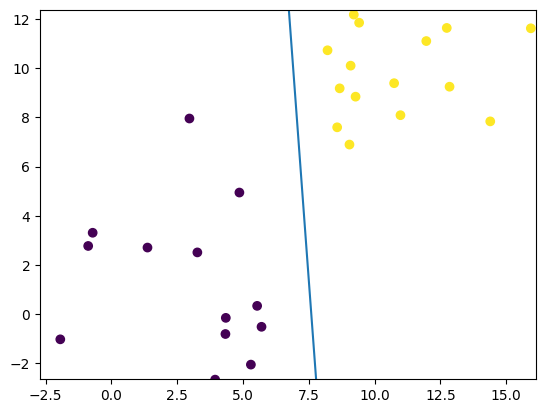

In [9]:
w,wo=perceptron_training(x,y,w,w0)